# 04_04: Smoothing and plotting time series

In [1]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
import getweather

def fillnans(array):
    x = np.arange(len(array))
    good = ~np.isnan(array)

    return np.interp(x, x[good], array[good])

In [3]:
hilo = getweather.getyear('HILO', ['TMIN','TMAX'], 2000)

In [4]:
hilo['TMIN'], hilo['TMAX'] = fillnans(hilo['TMIN']), fillnans(hilo['TMAX'])

In [7]:
round(np.mean(hilo['TMIN']),2), np.min(hilo['TMIN']), np.max(hilo['TMIN'])

(np.float64(19.1), np.float64(14.4), np.float64(23.3))

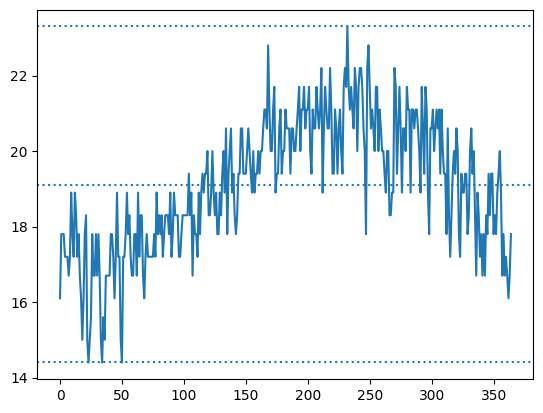

In [8]:
pp.plot(hilo['TMIN'])

# we loop over a list of functions!
for summary in [np.mean, np.min, np.max]:
    pp.axhline(summary(hilo['TMIN']), linestyle=':') # dotted line

In [9]:
mean, err = np.mean(hilo['TMIN']), math.sqrt(np.var(hilo['TMIN']))

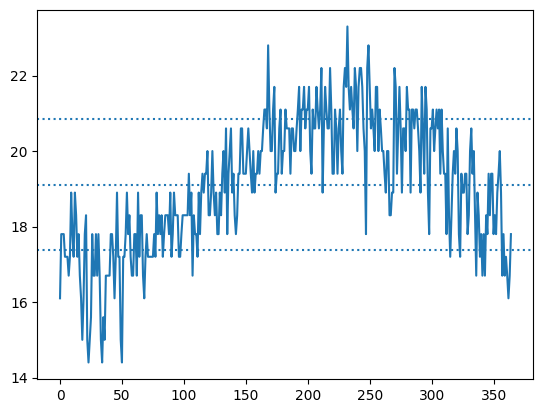

In [10]:
pp.plot(hilo['TMIN'])

for value in [mean, mean - err, mean + err]:
    pp.axhline(value, linestyle=':')

In [11]:
rain = fillnans(getweather.getyear('HILO', ['PRCP'], 2000)['PRCP'])

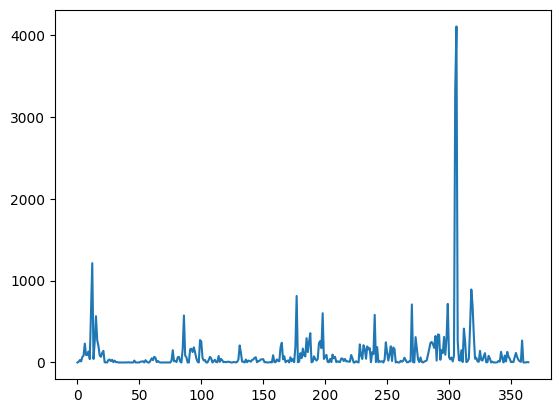

In [12]:
pp.plot(rain)

Smoothing data with np.convolve
- convolution : multiplies data in a sliding window witha  fixed mask
- for a mask of constant value, its equivalent toa  running mean

In [13]:
mask = np.ones(10) / 10
#replace each value with the average set of its neghbors

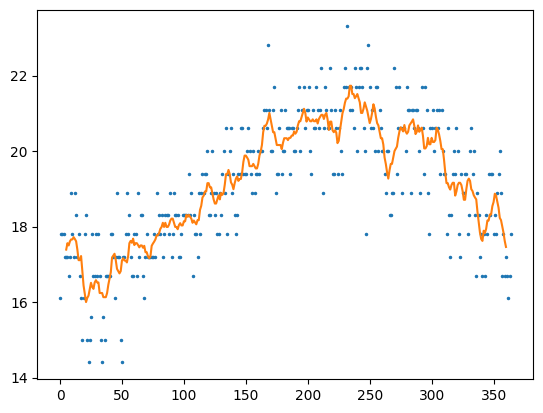

In [14]:
pp.plot(hilo['TMIN'], '.', ms=3) # smaller dots
pp.plot(range(5, 361), np.convolve(hilo['TMIN'], mask, mode='valid')) # align shorter vector

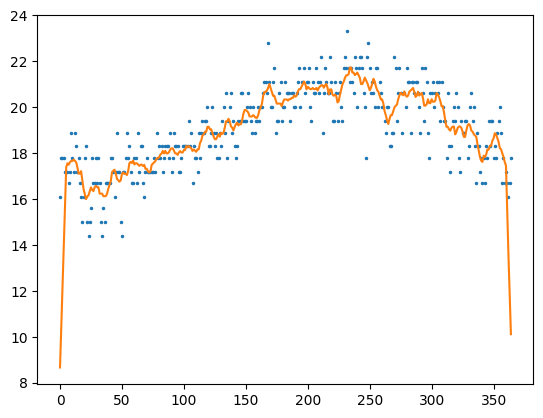

In [15]:
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(np.convolve(hilo['TMIN'], mask, mode='same'))

In [16]:
def smooth(array, window=10, mode='valid'):
    return np.convolve(array, np.ones(window)/window, mode)

In [17]:
len(smooth(hilo['TMIN'], 10))

356

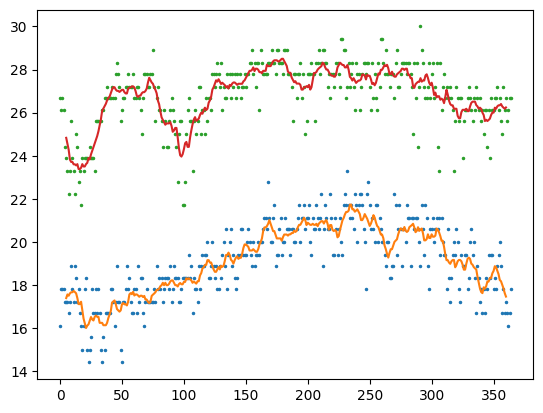

In [18]:
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(range(5, 361), smooth(hilo['TMIN'], 10))

pp.plot(hilo['TMAX'], '.', ms=3)
pp.plot(range(5, 361), smooth(hilo['TMAX'], 10))

In [19]:
def plotsmoothed(station, year):
    # get the data
    stationdata = getweather.getyear(station, ['TMIN','TMAX'], year)

    # repeat for TMIN and TMAX
    for obs in ['TMIN','TMAX']:   
        # fill NaNs and smooth
        data = smooth(fillnans(stationdata[obs]), 20)
        # plot, setting x to the post-smoothing range
        pp.plot(range(10, 356), data)

    # add title and set axes limits
    pp.title(station)
    pp.axis(xmin=1, xmax=365, ymin=-10, ymax=45)

(np.float64(1.0), np.float64(365.0), np.float64(15.0), np.float64(33.0))

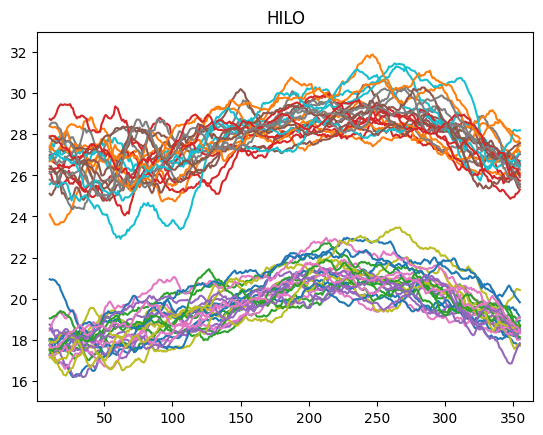

In [20]:
for year in range(2000, 2024):
    plotsmoothed('HILO', year)

pp.axis(ymin=15, ymax=33)

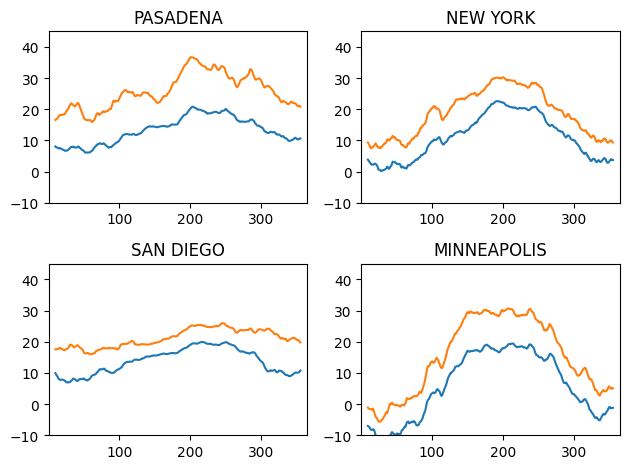

In [21]:
for i, city in enumerate(['PASADENA', 'NEW YORK', 'SAN DIEGO', 'MINNEAPOLIS'], start=1):
    pp.subplot(2, 2, i)
    plotsmoothed(city, 2023)

pp.tight_layout() # space out plots correctly